In [2]:
#Tuning a Decision Tree

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:,:2]
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [6]:
import pandas as pd
pd.DataFrame(X,columns=iris.feature_names[:2])

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()     #Instantiate tree with default parameters
dtc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)

0.7111111111111111

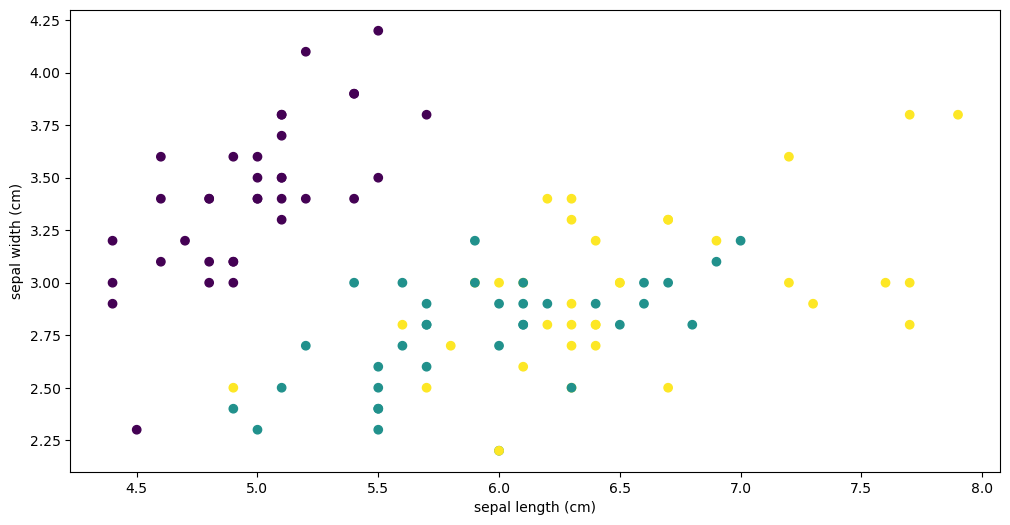

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=((12,6)))
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {'criterion':['gini','entropy'], 'max_depth' : [3,5,7,20]}

gs_inst = GridSearchCV(dtc,param_grid=param_grid,cv=5)
gs_inst.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 20]})

In [12]:
from sklearn.metrics import accuracy_score

y_pred_gs = gs_inst.predict(X_test)
accuracy_score(y_test, y_pred_gs)

0.6666666666666666

In [16]:
# Display the grid search results
results = gs_inst.cv_results_

# Extract the mean test scores and corresponding parameters
mean_test_scores = results['mean_test_score']
params = results['params']

# Combine them into a DataFrame for better readability
import pandas as pd
results_df = pd.DataFrame(params)
results_df['mean_test_score'] = mean_test_scores

# Display the DataFrame
print(results_df)


  criterion  max_depth  mean_test_score
0      gini          3         0.733333
1      gini          5         0.723810
2      gini          7         0.714286
3      gini         20         0.714286
4   entropy          3         0.723810
5   entropy          5         0.695238
6   entropy          7         0.742857
7   entropy         20         0.704762


In [18]:
zip(gs_inst.cv_results_['mean_test_score'],gs_inst.cv_results_['params'])

In [20]:
gs_inst.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [22]:
import numpy as np
from sklearn import tree
from sklearn.externals.six import StringIO

import pydot
from IPython.display import Image

dot_iris = StringIO()
tree.export_graphviz(gs_inst.best_estimator_, out_file = dot_iris, feature_names = iris.feature_names[:2])
graph = pydot.graph_from_dot_data(dot_iris.getvalue())

Image(graph.create_png())

ModuleNotFoundError: No module named 'sklearn.externals.six'

TypeError: float() argument must be a string or a real number, not 'zip'

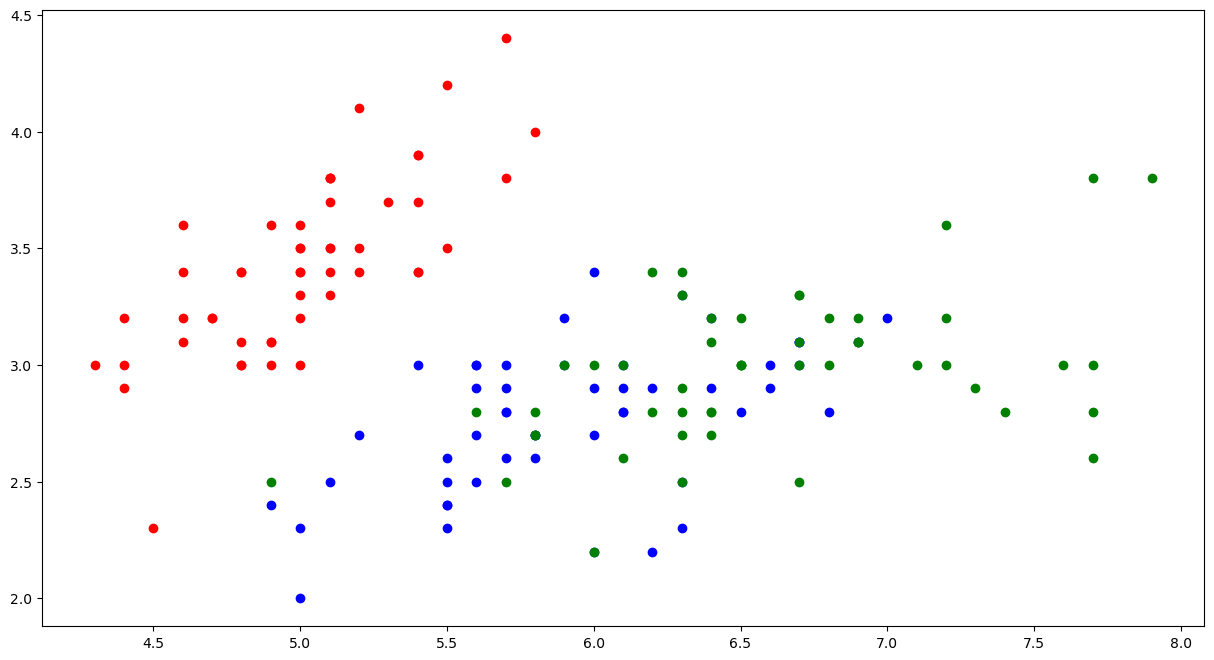

In [24]:
grid_interval = 0.02

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])

xmin_plot, xmax_plot = xmin - .5, xmax + .5
ymin_plot, ymax_plot = ymin - .5, ymax + .5

xx, yy = np.meshgrid(np.arange(xmin_plot, xmax_plot, grid_interval),
np.arange(ymin_plot, ymax_plot, grid_interval))

import matplotlib.pyplot as plt
%matplotlib inline

X_0 = X[y == 0]
X_1 = X[y == 1]
X_2 = X[y == 2]

plt.figure(figsize=(15,8)) #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')
plt.scatter(X_2[:,0],X_2[:,1], color = 'green')

test_preds = gs_inst.best_estimator_.predict(np.array(zip(xx.ravel(), yy.ravel())))

colors = np.array(['r', 'b','g'])
plt.scatter(xx.ravel(), yy.ravel(), color=colors[test_preds], alpha=0.15)
plt.scatter(X[:, 0], X[:, 1], color=colors[y])
plt.title("Decision Tree Visualization")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

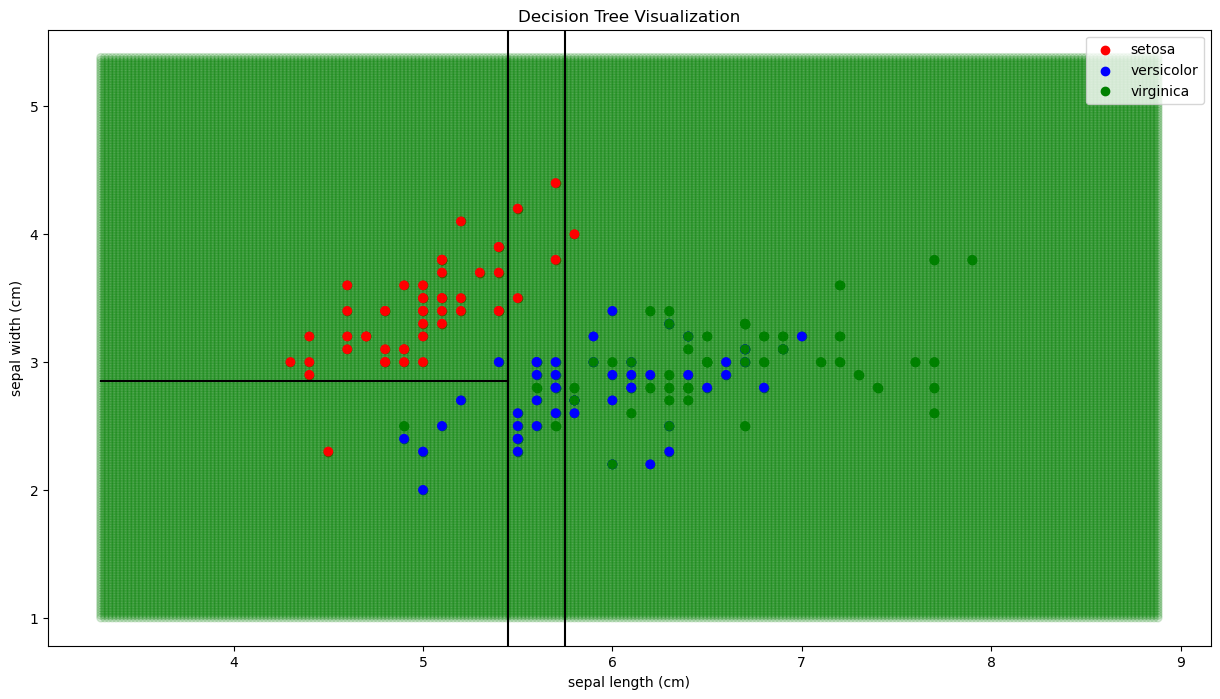

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Decision Tree Classifier using GridSearchCV
param_grid = {'max_depth': [3, 5, 7, 9]}
gs_inst = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
gs_inst.fit(X_train, y_train)

# Define the grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict on the grid
test_preds = gs_inst.best_estimator_.predict(np.c_[xx.ravel(), yy.ravel()])

# Plotting
plt.figure(figsize=(15, 8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label=iris.target_names[0])
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label=iris.target_names[1])
plt.scatter(X[y == 2, 0], X[y == 2, 1], color='green', label=iris.target_names[2])

colors = np.array(['r', 'b', 'g'])
plt.scatter(xx.ravel(), yy.ravel(), color=colors[test_preds], alpha=0.15)
plt.scatter(X[:, 0], X[:, 1], color=colors[y])
plt.title("Decision Tree Visualization")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# Example of decision boundaries (these values are just for illustration)
plt.axvline(x=5.45, color='black')
plt.axvline(x=5.75, color='black')
plt.plot((x_min, 5.45), (2.85, 2.85), color='black')

plt.legend()
plt.show()


Text(0, 0.5, 'Cross-validation Score')

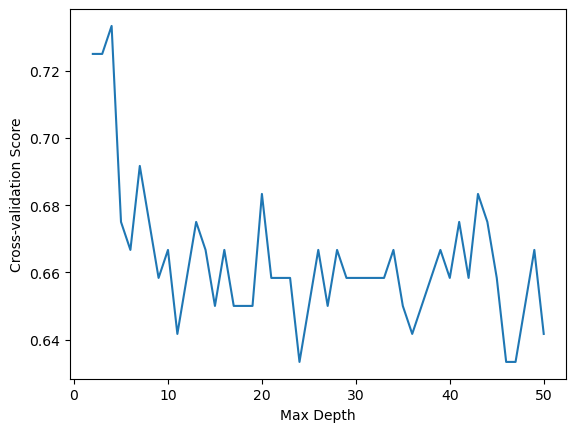

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()


from sklearn.model_selection import GridSearchCV, cross_val_score

max_depths = range(2,51)
param_grid = {'max_depth' : max_depths}

gs_inst = GridSearchCV(dtc, param_grid=param_grid,cv=5)
gs_inst.fit(X_train, y_train)

plt.plot(max_depths,gs_inst.cv_results_['mean_test_score'])
plt.xlabel('Max Depth')
plt.ylabel("Cross-validation Score")